In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.sample(frac=0.5, replace = True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
513,2,91,62,0,0,27.3,0.525,22,0
101,1,151,60,0,0,26.1,0.179,22,0
191,9,123,70,44,94,33.1,0.374,40,0
38,2,90,68,42,0,38.2,0.503,27,1
55,1,73,50,10,0,23.0,0.248,21,0
...,...,...,...,...,...,...,...,...,...
266,0,138,0,0,0,36.3,0.933,25,1
576,6,108,44,20,130,24.0,0.813,35,0
567,6,92,62,32,126,32.0,0.085,46,0
687,1,107,50,19,0,28.3,0.181,29,0


In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
df['Glucose']= np.where(df['Glucose']==0, df['Glucose'].median(), df['Glucose'])
df['BloodPressure']= np.where(df['BloodPressure']==0, df['BloodPressure'].median(), df['BloodPressure'])
df['SkinThickness']= np.where(df['SkinThickness']==0, df['SkinThickness'].median(), df['SkinThickness'])
df['BMI']= np.where(df['BMI']==0, df['BMI'].median(), df['BMI'])
df['Insulin']= np.where(df['Insulin']==0, df['Insulin'].median(), df['Insulin'])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
scaler.fit(df[['Glucose']])
df['Glucose']=scaler.transform(df[['Glucose']])

In [12]:
scaler.fit(df[['BloodPressure']])
df['BloodPressure']=scaler.transform(df[['BloodPressure']])

In [13]:
scaler.fit(df[['SkinThickness']])
df['SkinThickness']=scaler.transform(df[['SkinThickness']])

In [14]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [15]:
scaler.fit(df[['BMI']])
df['BMI']=scaler.transform(df[['BMI']])

In [16]:
scaler.fit(df[['DiabetesPedigreeFunction']])
df['DiabetesPedigreeFunction']=scaler.transform(df[['DiabetesPedigreeFunction']])

In [17]:
scaler.fit(df[['Insulin']])
df['Insulin']=scaler.transform(df[['Insulin']])

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,8,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,1,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


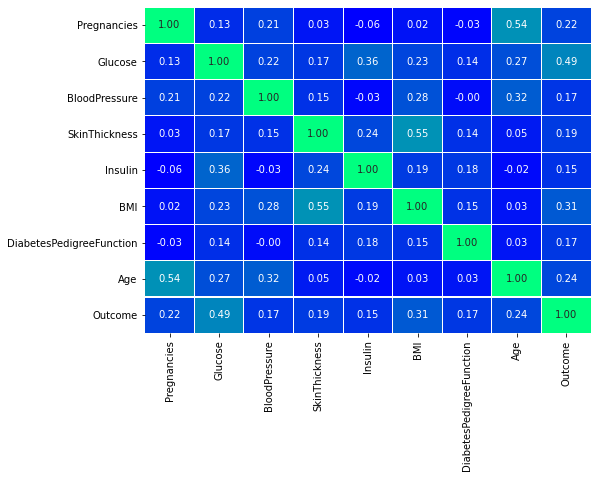

In [19]:
df_corr = df.corr()
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(df_corr, annot= True, fmt='.2f',lw=0.2, cmap='winter', cbar=False)

In [20]:
X = df.drop('Outcome', axis=1)
y= df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=30)

## Using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [24]:
lg.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_preds = lg.predict(X_test)

In [26]:
lg.score(X_test,y_test)

0.7922077922077922

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       104
           1       0.74      0.56      0.64        50

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.79      0.79      0.78       154



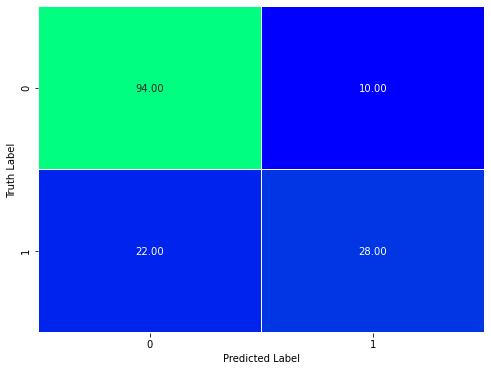

In [29]:
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot= True, fmt='.2f',lw=0.2, cmap='winter', cbar=False)
ax.set(xlabel = 'Predicted Label', ylabel = 'Truth Label');

In [30]:
print(accuracy_score(y_test,y_preds))

0.7922077922077922


In [31]:
# Specify the norm of the penalty
penalty = ['l1', 'l2', 'elasticnet', 'none']
# Inverse of regularization strength
C = np.logspace(-4,4,20)
# Algorithm to use in the optimization problem
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Maximum number of iterations taken for the solvers to converge
max_iter=[100,1000,2500,5000]
# Create the random grid
lg_random_grid = {'penalty': penalty,
               'C': C,
                'solver': solver,
                'max_iter': max_iter
              }
print(lg_random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [32]:
lg_randomcv = RandomizedSearchCV(estimator=lg, param_distributions=lg_random_grid,
                                  cv=10,verbose=2,random_state=100, n_jobs=-1)

In [33]:
lg_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.7622422         nan 0.76388154        nan        nan        nan
 0.76380222 0.75896351        nan        nan]
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [34]:
lg_randomcv.best_estimator_

LogisticRegression(C=0.0001, max_iter=5000, penalty='none', solver='saga')

In [35]:
lg_best_random_grid = lg_randomcv.best_estimator_

In [36]:
y_preds = lg_best_random_grid.predict(X_test)

In [37]:
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       104
           1       0.72      0.62      0.67        50

    accuracy                           0.80       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154

[[92 12]
 [19 31]]
0.7987012987012987


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=10)

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [41]:
rfc.score(X_train,y_train)

0.990228013029316

In [42]:
y_preds=rfc.predict(X_test)

In [43]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [44]:
rfc.score(X_test,y_test)

0.7727272727272727

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.71      0.50      0.59        50

    accuracy                           0.77       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.77      0.77      0.76       154



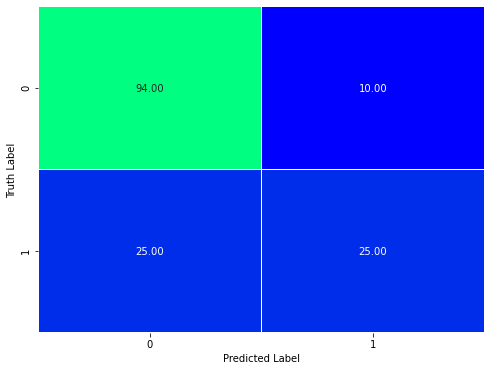

In [47]:
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot= True, fmt='.2f',lw=0.2, cmap='winter', cbar=False)
ax.set(xlabel = 'Predicted Label', ylabel = 'Truth Label');

In [48]:
print(accuracy_score(y_test,y_preds))

0.7727272727272727


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cvs = cross_val_score(rfc,X,y,cv=10, scoring ='accuracy')

In [51]:
cvs

array([0.67532468, 0.72727273, 0.75324675, 0.7012987 , 0.71428571,
       0.75324675, 0.76623377, 0.83116883, 0.76315789, 0.78947368])

In [52]:
cvs.mean()

0.7474709501025292

## Using Randomized SearchCV on Random Forest Classifier

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Numberof features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]
# Maximum number of samples required to split a node
min_samples_split=[2,5,10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,4,5,7,9]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                 'criterion': ['entropy','gini']}
print(random_grid)
               

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 3, 4, 5, 7, 9], 'criterion': ['entropy', 'gini']}


In [54]:
rf_randomcv = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                 n_iter=100, cv=10,verbose=2,random_state=100, n_jobs=-1)

In [55]:
rf_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 5, 7, 9],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [56]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 450,
 'criterion': 'entropy'}

In [57]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [58]:
best_random_grid = rf_randomcv.best_estimator_

In [59]:
y_preds = best_random_grid.predict(X_test)

In [60]:
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.69      0.62      0.65        50

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

[[90 14]
 [19 31]]
0.7857142857142857


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],
                        rf_randomcv.best_params_['min_samples_leaf']+2,
                        rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-2,
                        rf_randomcv.best_params_['min_samples_split']-1,
                        rf_randomcv.best_params_['min_samples_split'],
                        rf_randomcv.best_params_['min_samples_split']+1,
                        rf_randomcv.best_params_['min_samples_split']+2],
     'n_estimators':[rf_randomcv.best_params_['n_estimators']-200,
                     rf_randomcv.best_params_['n_estimators']-100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators']+100,
                     rf_randomcv.best_params_['n_estimators']+200]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [600, 700, 800, 900, 1000]}


In [63]:
grid_search=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [450],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [64]:
best_grid= grid_search.best_estimator_

In [65]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=600)

In [66]:
y_pred = best_grid.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.69      0.62      0.65        50

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

[[90 14]
 [19 31]]
0.7857142857142857
